In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [4]:
X_train = pd.read_excel("Số liệu nguồn gốc IR.xlsx", "X").iloc[:,1:]
X_test = pd.read_excel("Số liệu nguồn gốc IR.xlsx", "Xtest").iloc[:,1:]
y_train = pd.read_excel("Số liệu nguồn gốc IR.xlsx", "class")["encode"]
y_test = pd.read_excel("Số liệu nguồn gốc IR.xlsx", "classtest")["encode"]

In [5]:
X_train.shape

(100, 1555)

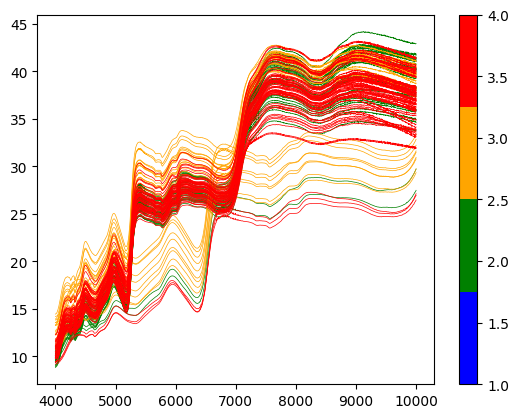

In [6]:
import matplotlib.ticker as ticker 
from matplotlib import cm
from matplotlib.colors import ListedColormap

X = pd.concat((X_train, X_test))
y = pd.concat((y_train, y_test))
full_df = pd.concat((X, y), axis=1)
full_df["encode"]

colors = ['blue', 'green', 'orange', 'red']
cmap = ListedColormap(colors)
unq_labels = np.unique(full_df["encode"])
fig, ax = plt.subplots(1, 1) 
for index, label in enumerate(unq_labels):
    df = full_df.loc[full_df["encode"]==label]
    ax.plot(df.iloc[:, :-1].T, c=cmap(label), linewidth=0.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000)) 
cbar=plt.colorbar(plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=min(unq_labels), vmax=max(unq_labels))), ax=ax)
plt.show()

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

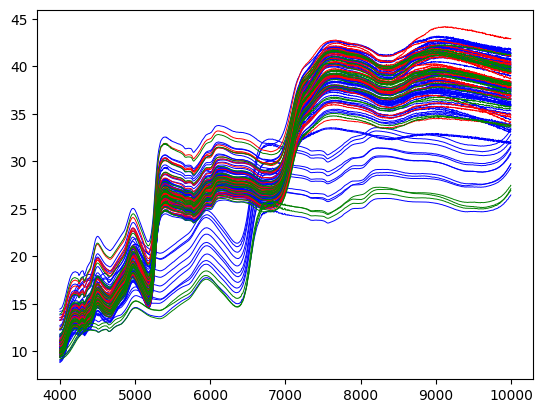

In [8]:
# Vẽ phổ IR của tập train, test và validate
plt.plot(X_train.T, c='b', linewidth=0.7)
plt.plot(X_test.T, c='r', linewidth=0.7)
plt.plot(X_val.T, c='g', linewidth=0.7)
plt.show()

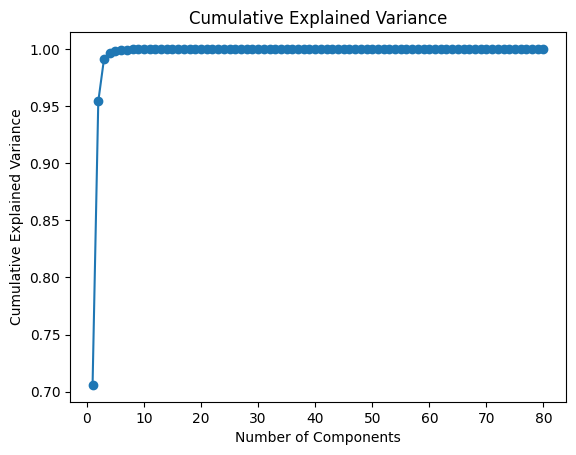

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
pca = PCA()
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

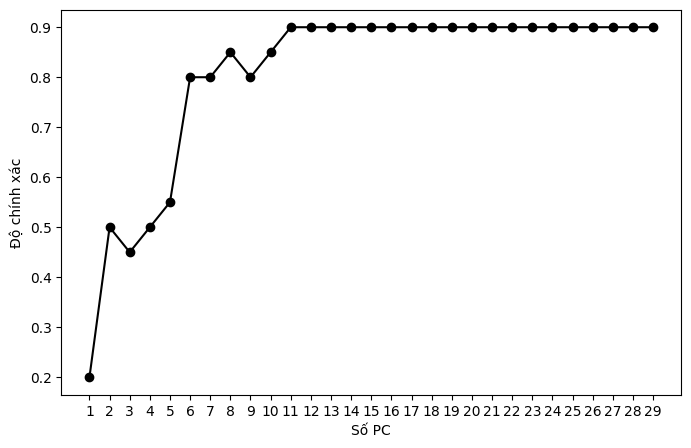

In [10]:
accuracys = []
for i in range (1, 30):
    # Tiến hành PCA với i cấu tử chính
    pca = PCA(i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_val_pca = pca.transform(X_val)
    # Tạo mô hình logistic và học X_train đã pca và y_train
    softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=4).fit(X_train_pca, y_train)
    # Sử dụng mô hình để dự đoán dựa trên X_val đã PCA
    y_val_pred = softmax.predict(X_val_pca)
    # Tính toán độ chính xác so với giá trị thực tế
    accuracys.append(accuracy_score(y_val, y_val_pred))
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(accuracys) + 1), accuracys, "k-o")
plt.xticks(np.arange(1, len(accuracys) + 1,1))
plt.xlabel("Số PC")
plt.ylabel("Độ chính xác")
plt.show()

Accuracy: 0.84


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


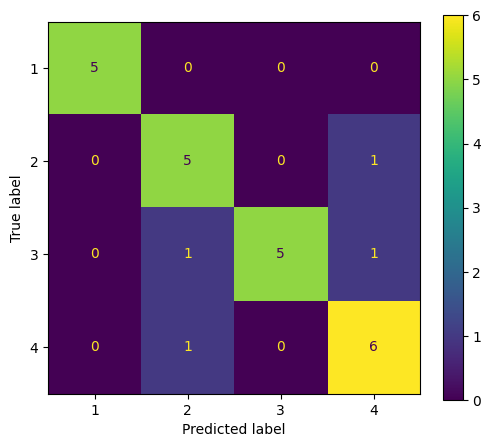

In [11]:
pca = PCA(11)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=4).fit(X_train_pca, y_train)
y_pred = softmax.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
classes = [1, 2, 3, 4]
cm = confusion_matrix(y_test, y_pred, labels=classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','2', '3', '4'])
fig, ax = plt.subplots(figsize=(6,5))
cmd.plot(ax=ax)

In [12]:
pred_df = pd.DataFrame(y_pred, columns=["Predict"])
test_df = pd.DataFrame(y_test.values, columns=["Test"])
final_df = pd.concat([pred_df, test_df], axis=1)
final_df

,Predict,Test
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,2,2
6,2,2
7,2,2
8,2,2
9,4,2
